              precision    recall  f1-score   support

  Droite_Pct       1.00      0.67      0.80         3
  Gauche_Pct       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3

Accuracy: 0.72 (+/- 0.42)


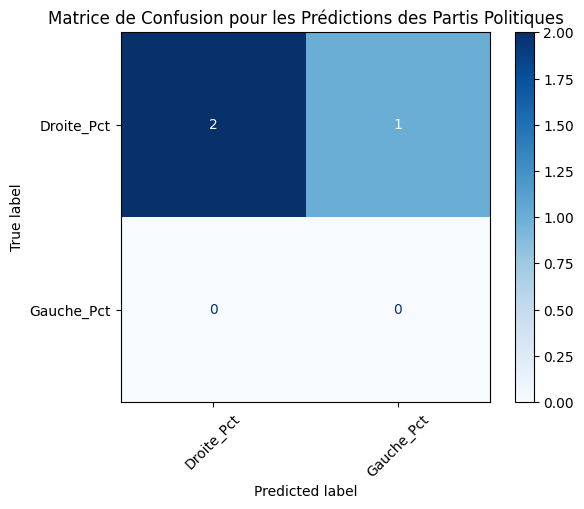

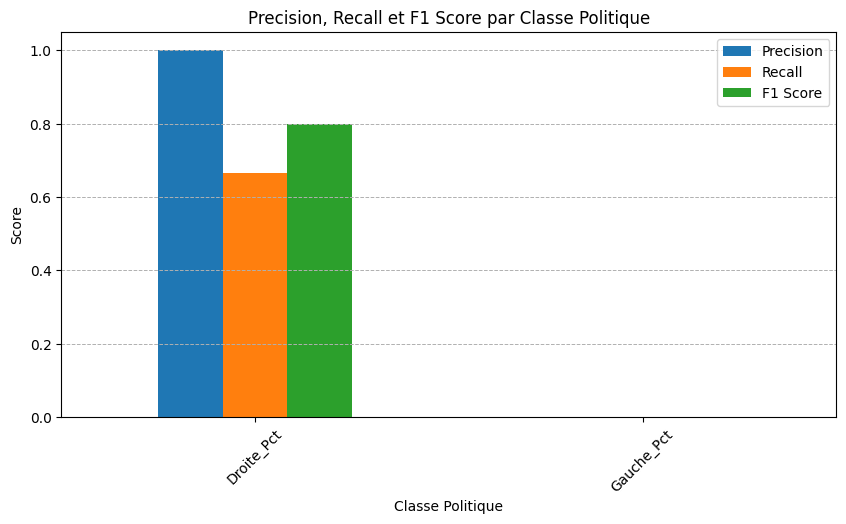

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np


# Load the data
data = pd.read_parquet('../dataset/dataframe_politique_pouvoir_achat_chomage.parquet')

# Drop the columns that are not needed
# drop columns 'département'
data = data.drop(columns=['département'])
data = data.drop(columns=['circonscription'])

for col in data.columns:
    if data[col].dtype == object:
        data[col] = data[col].str.replace(',', '.').astype(float)

# Remplacer les virgules par des points et convertir en float
for col in ['Extrême gauche_Pct', 'Gauche_Pct', 'Droite_Pct', 'Extrême droite_Pct']:
    data[col] = data[col].astype(float)

y = data[['Extrême gauche_Pct', 'Gauche_Pct', 'Droite_Pct', 'Extrême droite_Pct']]. 

features = ['Code département', 'Inscrits', 'Votants', 'Exprimés', 'Blancs et nuls', 'Pouvoir d\'achat par unité de consommation', 'Pouvoir d’achat du revenu disponible brut', 'Chomage']
X = data[features]


# Division en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédiction et évaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions, zero_division=0))

# Utilisation de StratifiedKFold pour assurer la distribution équilibrée des classes
skf = StratifiedKFold(n_splits=3)  # Réduisez le nombre de plis si nécessaire
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# Prédiction pour l'ensemble de test
predictions = model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Affichage de la matrice de confusion
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion pour les Prédictions des Partis Politiques')
plt.xticks(rotation=45)
plt.show()


# Calcul des métriques pour chaque classe
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, predictions, labels=model.classes_, zero_division=0)

# Création d'un DataFrame pour les métriques
class_report_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1 Score': fscore
}, index=model.classes_)

# Tracé des métriques
class_report_df.plot(kind='bar', figsize=(10, 5))
plt.title('Precision, Recall et F1 Score par Classe Politique')
plt.xlabel('Classe Politique')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(loc='upper right')
plt.show()





In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load the data
data = pd.read_parquet('../dataset/dataframe_politique_pouvoir_achat_chomage.parquet')

# Drop the columns that are not needed
# drop columns 'département'
data = data.drop(columns=['département'])
data = data.drop(columns=['circonscription'])

for col in data.columns:
    if data[col].dtype == object:
        data[col] = data[col].str.replace(',', '.').astype(float)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sélection des features et cibles
X = data[['Chomage', 'Pouvoir d’achat du revenu disponible brut', 'Pouvoir d\'achat par unité de consommation']]
y = data[['Extrême gauche_Pct', 'Gauche_Pct', 'Droite_Pct', 'Extrême droite_Pct']]

import numpy as np

def transform_to_classes(y):
    bins = [0, 25, 50, 75, 100]  # Définir les seuils
    labels = [0, 1, 2, 3]  # Les classes correspondantes
    y_classes = pd.cut(y, bins=bins, labels=labels, include_lowest=True)
    return y_classes.astype(int)  # Convertir en entiers pour la classification

# Appliquer la transformation pour chaque colonne du DataFrame
y_train_class = y_train.apply(transform_to_classes)
y_test_class = y_test.apply(transform_to_classes)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Création du modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 arbres dans la forêt

# Entraînement du modèle
model.fit(X_train, y_train_class)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner le classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train_class)

# Prédire les probabilités pour l'ensemble de test
probabilities = classifier.predict_proba(X_test)
print(probabilities)


from sklearn.model_selection import GridSearchCV

# Définition des paramètres pour la recherche par grille
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Création de la grille de recherche
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                        param_grid=param_grid,
                        cv=3,
                        scoring='neg_mean_squared_error',
                        verbose=2)

# Exécution de la recherche par grille
grid_search.fit(X_train, y_train)

# Meilleurs paramètres et score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score MSE:", -grid_search.best_score_)


MSE: 806.0741302184106
[array([[0.77, 0.23],
       [0.86, 0.14],
       [0.77, 0.23]]), array([[0.02, 0.72, 0.26],
       [0.65, 0.26, 0.09],
       [0.02, 0.73, 0.25]]), array([[0.22, 0.71, 0.07],
       [0.14, 0.09, 0.77],
       [0.22, 0.71, 0.07]]), array([[0.71, 0.29],
       [1.  , 0.  ],
       [0.77, 0.23]])]
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate

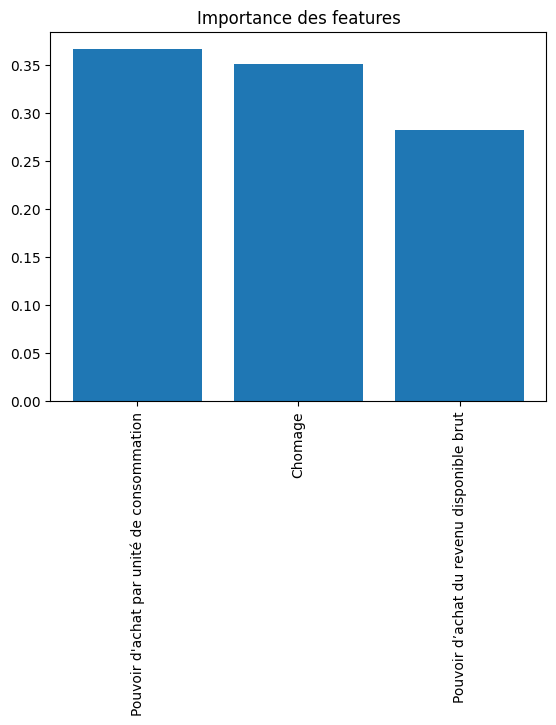

In [106]:
import matplotlib.pyplot as plt

# Afficher l'importance des features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Importance des features")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


In [108]:
from sklearn.multioutput import MultiOutputClassifier

# Créer et entraîner le classifier multi-output
multi_output_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
multi_output_classifier.fit(X_train, y_train_class)

# Prédire les cibles pour l'ensemble de test
y_pred = multi_output_classifier.predict(X_test)

# Évaluation du modèle pour chaque cible séparément
for i, col in enumerate(y.columns):
    accuracy = accuracy_score(y_test_class[col], y_pred[:, i])
    print(f'Accuracy for {col}: {accuracy}')
    print(classification_report(y_test_class[col], y_pred[:, i]))


Accuracy for Extrême gauche_Pct: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Accuracy for Gauche_Pct: 0.3333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

Accuracy for Droite_Pct: 0.6666666666666666
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0

    accuracy                           0.6

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarn

In [109]:
classifiers = {}
for col in y_train_class.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train_class[col])
    classifiers[col] = clf

# Évaluation pour chaque colonne/classifieur
for col, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test_class[col], y_pred)
    print(f'Accuracy for {col}: {accuracy}')
    print(classification_report(y_test_class[col], y_pred))


Accuracy for Extrême gauche_Pct: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Accuracy for Gauche_Pct: 0.3333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

Accuracy for Droite_Pct: 0.6666666666666666
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0

    accuracy                           0.6

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarn

Nombre de listes de probabilités renvoyées : 4
Proba list 0 a la forme : (3, 2)
Proba list 1 a la forme : (3, 3)
Proba list 2 a la forme : (3, 3)
Proba list 3 a la forme : (3, 2)


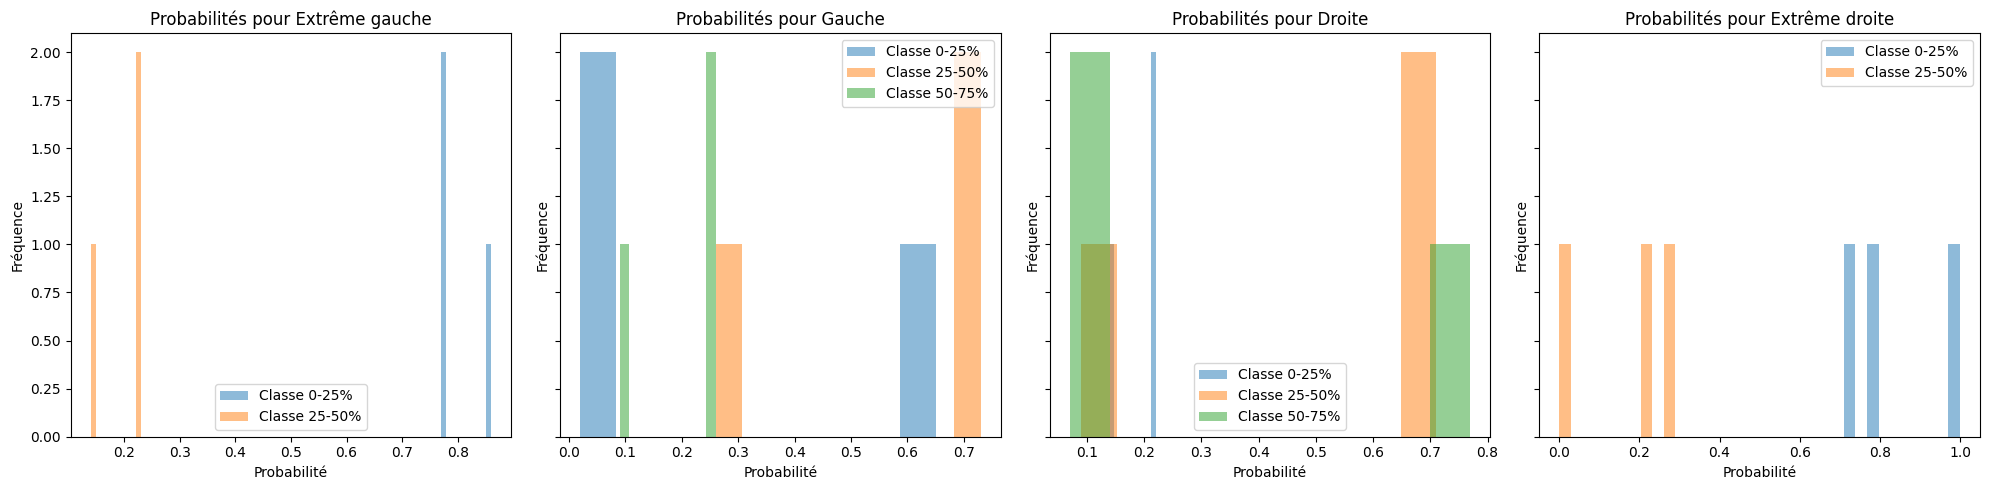

In [112]:
import matplotlib.pyplot as plt

# Prédire les probabilités pour l'ensemble de test
# Assurons-nous que 'classifier' est un MultiOutputClassifier encapsulant un RandomForestClassifier
probabilities = classifier.predict_proba(X_test)

# Afficher la structure des données pour comprendre comment elles sont organisées
print("Nombre de listes de probabilités renvoyées :", len(probabilities))
for i, proba_list in enumerate(probabilities):
    print(f"Proba list {i} a la forme : {np.array(proba_list).shape}")


# Supposons que 'probabilities' est la liste des listes des probabilités retournées par predict_proba
parties = ['Extrême gauche', 'Gauche', 'Droite', 'Extrême droite']  # Noms des partis
classes = ['0-25%', '25-50%', '50-75%', '75-100%']  # Étiquettes des classes

# Définition des couleurs, une pour chaque classe
colors = ['skyblue', 'orange', 'limegreen', 'red']

# Création de graphiques pour chaque parti
fig, axes = plt.subplots(nrows=1, ncols=len(probabilities), figsize=(24, 6), sharey=True)

for i, ax in enumerate(axes):
    party_probs = probabilities[i]  # Probabilités pour le parti i
    num_classes = len(party_probs[0])  # Le nombre de classes pour ce parti
    
    # Calcul des barres pour l'histogramme de chaque classe
    bins = np.linspace(0, 1, 11)
    
    for class_idx in range(num_classes):
        # Probabilités de la classe class_idx pour le parti i
        class_probs = [proba[class_idx] for proba in party_probs]

        # Afficher la distribution des probabilités pour la classe
        ax.hist(class_probs, bins=bins, color=colors[class_idx], alpha=0.7, label=f'{classes[class_idx]}')
    
    # Améliorations de lisibilité
    ax.set_xlim([0, 1])
    ax.set_xticks(bins)
    ax.set_xticklabels(['{:.0f}%'.format(x * 100) for x in bins], rotation=45, ha="right")
    ax.set_title(f'Probabilités pour {parties[i]}', fontsize=16)
    ax.set_xlabel('Probabilité', fontsize=14)
    ax.set_ylabel('Fréquence', fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

